In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

# Homie
Numerous apartment rental websites in London meticulously outline the details of available apartments in any given city. However, these platforms often lack comprehensive information about essential services and amenities surrounding the apartments. This raises a pertinent question: what is the ideal solution for individuals seeking accommodation near a Hospital, requiring 2 Bathrooms, and with a monthly rent budget of under 1500 pounds?

Introducing "HOMIE" – our innovative scalable solution designed to alleviate the hassle of extensive research. With HOMIE, we offer the answer to your query, saving you valuable time that would otherwise be spent on exhaustive searches.


## EDA

In [6]:
# Load your CSV file into a Pandas DataFrame
df = pd.read_csv('../../data/raw/rightmoves_data.csv')

# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,address,price_per_month,price_per_week,let_available_date,deposit,min_tenancy,furnish_type,let_type,house_type,bedrooms,bathrooms,dimensions,description
0,https://www.rightmove.co.uk/properties/1452871...,"Exhibition Way, London HA9","£3,373 pcm",£778 pw,Ask agent,Ask agent,Ask agent,Ask agent,Furnished,Apartment,3,2,Ask agent,Elevate your rental experience at Tene Wembley...
1,https://www.rightmove.co.uk/properties/8677365...,"6 Westfield Avenue, London, E20","£2,784 pcm",£642 pw,Now,£350,12 months,Furnished,Long term,Apartment,1,1,516 sq ft\n48 sq m,Discover exceptional rental living with our pr...
2,https://www.rightmove.co.uk/properties/8677365...,"Silwood Street, London, SE16","£2,145 pcm",£495 pw,Ask agent,"£2,475",Ask agent,Furnished,Long term,Flat,2,1,Ask agent,Available with Zero Deposit Guarantee. Modern ...
3,https://www.rightmove.co.uk/properties/8677353...,"Station Road, London, SE13","£2,295 pcm",£530 pw,07/03/2024,"£2,400",Ask agent,Unfurnished,Long term,Apartment,2,2,Ask agent,Professional landlord FIZZY LIVING is excited ...
4,https://www.rightmove.co.uk/properties/1450672...,"Lithos Road, Swiss Cottage, London","£2,080 pcm",£480 pw,Ask agent,"£2,400",Ask agent,Ask agent,Long term,Flat,2,1,505 sq ft\n47 sq m,Newly refurbished two bedroom property to rent...


In [7]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1002 non-null   object
 1   address             1002 non-null   object
 2   price_per_month     1002 non-null   object
 3   price_per_week      1002 non-null   object
 4   let_available_date  1002 non-null   object
 5   deposit             1002 non-null   object
 6   min_tenancy         1002 non-null   object
 7   furnish_type        1002 non-null   object
 8   let_type            1002 non-null   object
 9   house_type          1002 non-null   object
 10  bedrooms            1002 non-null   object
 11  bathrooms           1002 non-null   object
 12  dimensions          1002 non-null   object
 13  description         1002 non-null   object
dtypes: object(14)
memory usage: 109.7+ KB


In [8]:
# Summary statistics of numerical columns
df.describe()

,Unnamed: 0,address,price_per_month,price_per_week,let_available_date,deposit,min_tenancy,furnish_type,let_type,house_type,bedrooms,bathrooms,dimensions,description
count,1002,1002,1002,1002,1002,1002,1002,1002,1002,1002,1002,1002,1002,1002
unique,1002,908,341,299,89,286,4,5,7,21,10,29,187,965
top,https://www.rightmove.co.uk/properties/1452871...,"Bale & Anchor, Conington Road, SE13","£2,400 pcm",£554 pw,Now,Ask agent,Ask agent,Furnished,Long term,Flat,1,1,Ask agent,LONG LET. ALL BILLS INCLUDED/ SINGLE OCCUPANTS...
freq,1,8,25,26,325,292,905,417,885,429,420,534,662,6


In [9]:
# Check for missing values
df.isnull().sum()

Unnamed: 0            0
address               0
price_per_month       0
price_per_week        0
let_available_date    0
deposit               0
min_tenancy           0
furnish_type          0
let_type              0
house_type            0
bedrooms              0
bathrooms             0
dimensions            0
description           0
dtype: int64

## Cleaning the data

In [10]:
# Extract the price from the string and make it an int
df['price_per_month'] = df['price_per_month'].str.replace('£', '').str.replace('pcm', '').str.replace(',', '').astype(int)
df['price_per_week'] = df['price_per_week'].str.replace('£', '').str.replace('pw', '').str.replace(',', '').astype(int)

# Clean deposit
df['deposit'] = df['deposit'].replace('Ask agent', '0')
def clean_and_convert_currency(currency):
    cleaned_currency = currency.replace('£', '').replace(',', '')  # Remove currency symbol and commas
    return int(cleaned_currency)  # Convert to integer

# Apply the function to the 'price' column
df['deposit'] = df['deposit'].apply(lambda x: clean_and_convert_currency(x))
df['deposit'] = df['deposit'].replace(0, None)

# Replace non-numeric values in 'bathrooms' and 'bedrooms' with NaN
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')

df['bathrooms'] = df['bathrooms'].astype('Int64')
df['bedrooms'] = df['bedrooms'].astype('Int64')

# Define a function to extract the number between "sq ft" and "sq m"
def extract_second_number(dimensions):
    # Using regular expression to find the second number
    match = re.search(r'(\d+)\s+sq\s+m', dimensions)
    if match:
        return int(match.group(1))
    else:
        return None

# Apply the extraction function to create a new column
df['dimensions_sq_m'] = df['dimensions'].apply(extract_second_number)
df.drop("dimensions", axis='columns', inplace=True)

In [17]:
df.head()

,Unnamed: 0,address,price_per_month,price_per_week,let_available_date,deposit,min_tenancy,furnish_type,let_type,house_type,bedrooms,bathrooms,description,dimensions_sq_m
0,https://housinganywhere.com/room/ut1460416/gb/...,"Leman Street, London",1660,415,now,8300,1 month,Furnished,Long term,Apartment,1,2,Drapery Place is located right in the heart of...,16.0
1,https://housinganywhere.com/room/ut1483563/gb/...,"James Avenue, London",1158,290,now,1158,3 months,Furnished,Long term,Apartment,1,1,Presenting Our Desirable Unit with a Private P...,17.0
2,https://housinganywhere.com/room/ut1355769/gb/...,"Olympic Way, London",1750,438,now,2187,6 months,Furnished,Long term,Apartment,1,2,"Modern living, reinvented. Experience our all-...",41.0
3,https://housinganywhere.com/room/ut1482540/gb/...,"Anson Road, London",897,224,now,897,3 months,Furnished,Long term,Apartment,1,2,💢💢💢\n\n🔸Please note that advertised sizes are ...,18.0
4,https://housinganywhere.com/room/ut1483903/gb/...,"Blenheim Gardens, London",1200,300,now,1167,3 months,Furnished,Long term,Apartment,1,2,💢💢💢\n\n🔸Please note that advertised sizes are ...,17.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1002 non-null   object 
 1   address             1002 non-null   object 
 2   price_per_month     1002 non-null   int64  
 3   price_per_week      1002 non-null   int64  
 4   let_available_date  1002 non-null   object 
 5   deposit             646 non-null    object 
 6   min_tenancy         1002 non-null   object 
 7   furnish_type        1002 non-null   object 
 8   let_type            1002 non-null   object 
 9   house_type          1002 non-null   object 
 10  bedrooms            988 non-null    Int64  
 11  bathrooms           887 non-null    Int64  
 12  description         1002 non-null   object 
 13  dimensions_sq_m     225 non-null    float64
dtypes: Int64(2), float64(1), int64(2), object(9)
memory usage: 111.7+ KB


In [12]:
df.describe()

,price_per_month,price_per_week,bedrooms,bathrooms,dimensions_sq_m
count,1002.000000,1002.000000,988.0,887.0,225.000000
mean,2843.110778,656.111776,1.91498,1.472379,80.324444
std,1917.272283,442.446650,1.017007,0.667762,53.441695
min,110.000000,25.000000,1.0,1.0,7.000000
25%,1796.250000,414.250000,1.0,1.0,53.000000
50%,2383.000000,550.000000,2.0,1.0,70.000000
75%,3250.000000,750.000000,2.0,2.0,90.000000
max,22533.000000,5200.000000,6.0,6.0,645.000000


## Plot the data

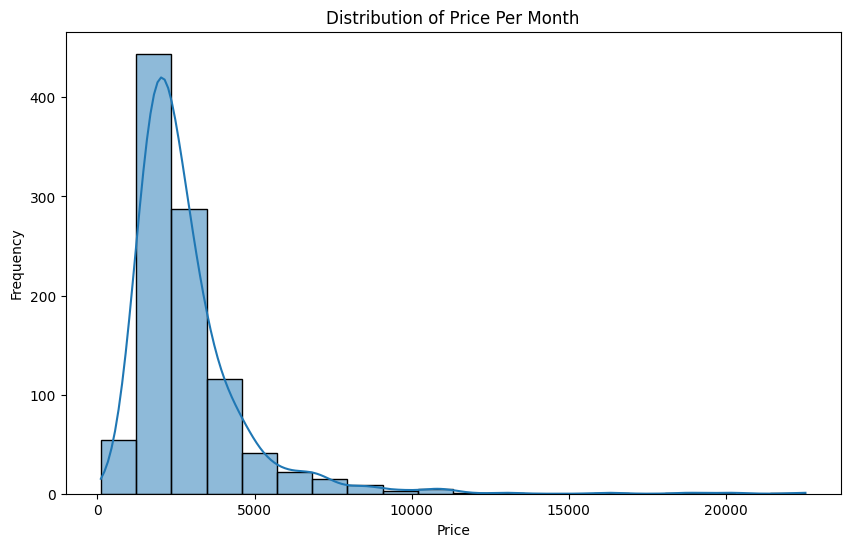

In [13]:
# Plot the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_month'], bins=20, kde=True)
plt.title('Distribution of Price Per Month')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

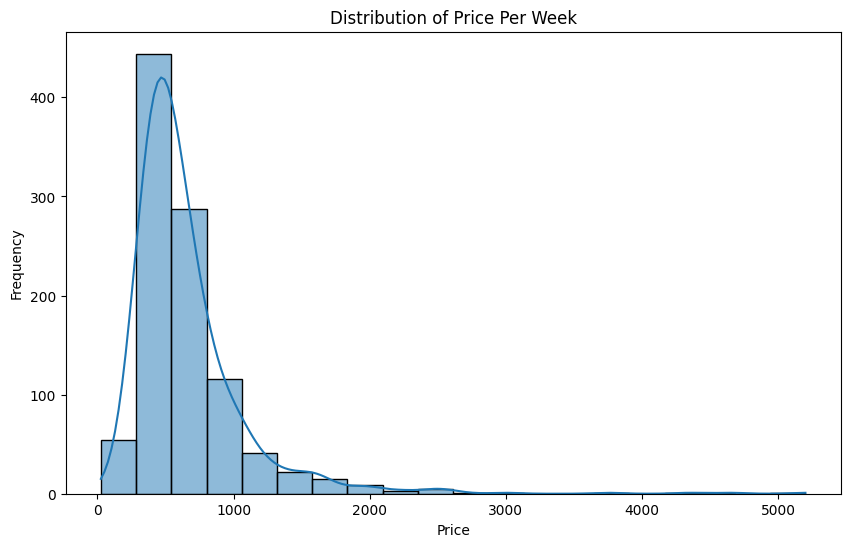

In [14]:
# Plot the distribution of prices per week
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_week'], bins=20, kde=True)
plt.title('Distribution of Price Per Week')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

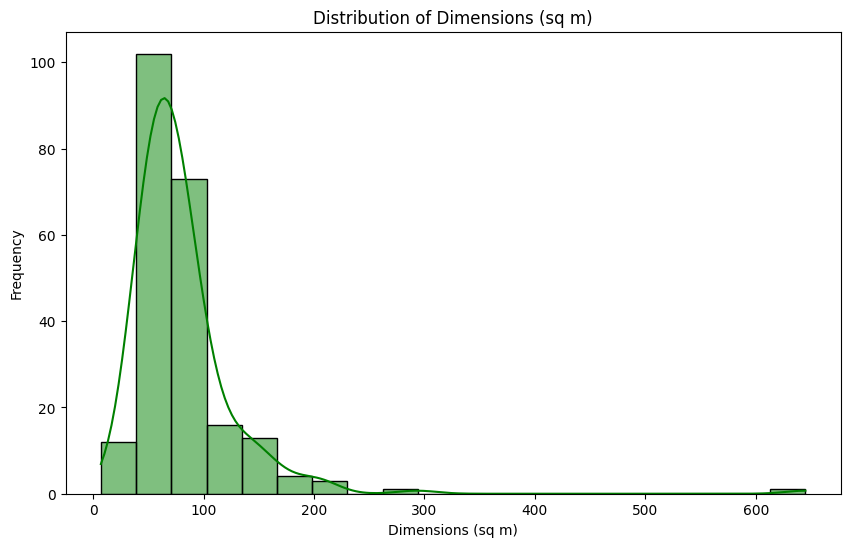

In [15]:
# Plot the distribution of dimensions_sq_m
plt.figure(figsize=(10, 6))
sns.histplot(df['dimensions_sq_m'].dropna(), bins=20, kde=True, color='green')
plt.title('Distribution of Dimensions (sq m)')
plt.xlabel('Dimensions (sq m)')
plt.ylabel('Frequency')
plt.show()

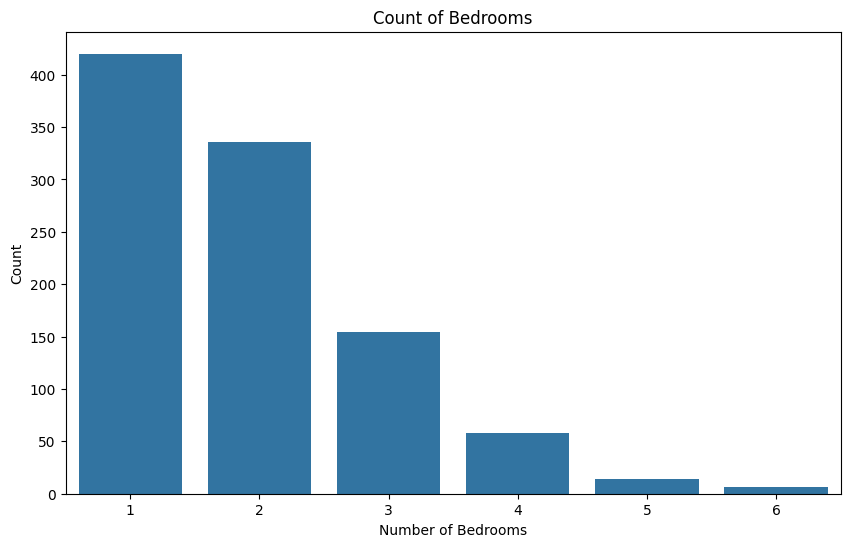

In [16]:
# Plot the count of bedrooms
plt.figure(figsize=(10, 6))
sns.countplot(data=df.dropna(subset=['bedrooms']), x='bedrooms')
plt.title('Count of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

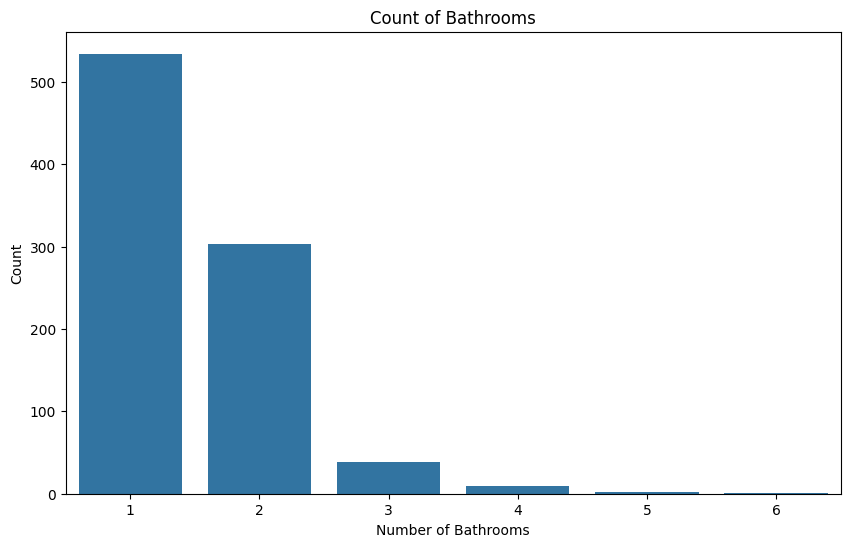

In [17]:
# Plot the count of bathrooms
plt.figure(figsize=(10, 6))
sns.countplot(data=df.dropna(subset=['bathrooms']), x='bathrooms')
plt.title('Count of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

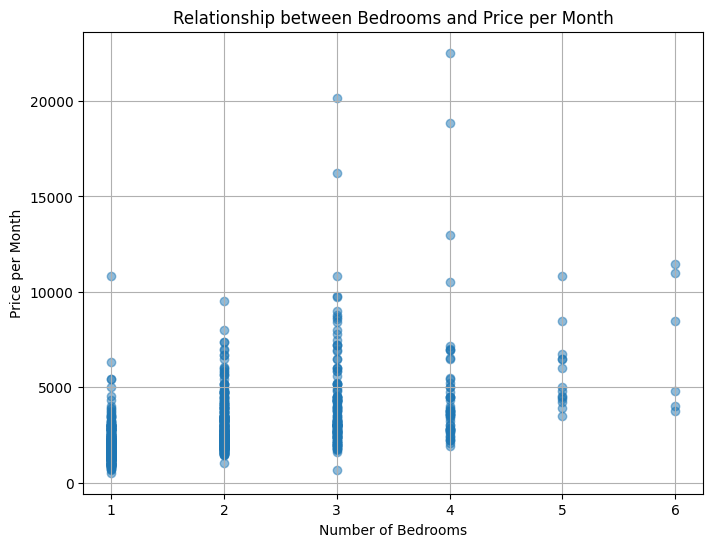

In [18]:
# Relationship between bedrooms and price

# Drop rows with missing values
df_clean = df.dropna(subset=['bedrooms', 'price_per_month'])

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['bedrooms'], df_clean['price_per_month'], alpha=0.5)
plt.title('Relationship between Bedrooms and Price per Month')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price per Month')
plt.grid(True)
plt.show()